# Data Reading

## Importing

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import os
%matplotlib inline

## Reading Data

In [23]:
def read_dataset(fileName="GSPC.csv"):
    cwd = os.getcwd()
    dataset_path = os.path.join(cwd, fileName)
    data = pd.read_csv(dataset_path, parse_dates=True, infer_datetime_format=True)
    return data
                 
dataset = read_dataset()   

## About Data

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-28,1783.000000,1793.869995,1779.489990,1792.500000,1792.500000,3437830000
1,2014-01-29,1790.150024,1790.150024,1770.449951,1774.199951,1774.199951,3964020000
2,2014-01-30,1777.170044,1798.770020,1777.170044,1794.189941,1794.189941,3547510000
3,2014-01-31,1790.880005,1793.880005,1772.260010,1782.589966,1782.589966,4059690000
4,2014-02-03,1782.680054,1784.829956,1739.660034,1741.890015,1741.890015,4726040000


In [33]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2266.335980,2276.272828,2255.342542,2266.536878,2266.536878,3.591100e+09
std,311.527592,312.238347,310.487640,311.082279,311.082279,6.926642e+08
min,1743.819946,1755.790039,1737.920044,1741.890015,1741.890015,1.349780e+09
25%,2031.654968,2041.045044,2020.184998,2031.565002,2031.565002,3.186630e+09
50%,2131.719971,2144.379883,2125.350098,2132.979980,2132.979980,3.490260e+09
75%,2548.714966,2555.234985,2532.244995,2547.744995,2547.744995,3.893045e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,7.609010e+09


In [4]:
dataset.shape

(1259, 7)

In [24]:
time_n_closing_value = dataset.iloc[:,[0,4]]

Text(0, 0.5, 'Closing Time Value')

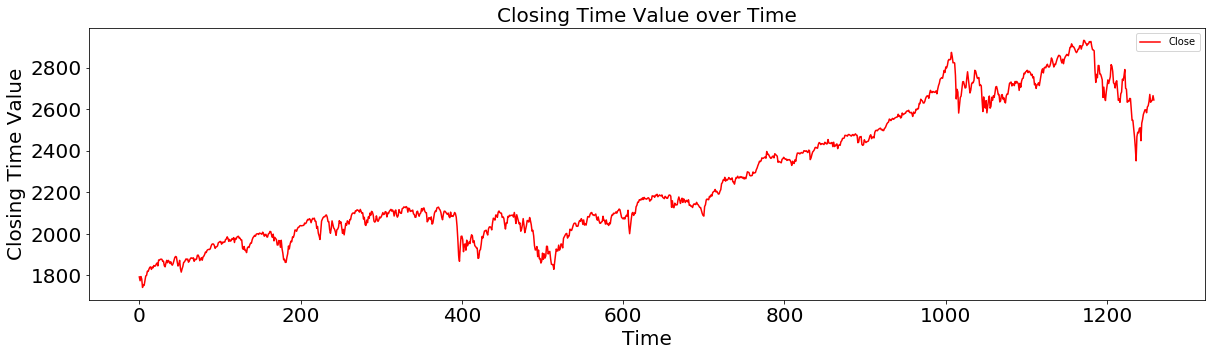

In [25]:
ax = (time_n_closing_value.plot.line(figsize=(20,5), fontsize=20, color='red'))
ax.set_title("Closing Time Value over Time", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Closing Time Value", fontsize=20)

# Tensorflow Implementation

## Configuration for RNN

In [26]:
class RNNConfig():
    input_size=1
    num_steps=30
    lstm_size=128
    num_layers=1
    keep_prob=0.8
    batch_size = 64
    init_learning_rate = 0.001
    learning_rate_decay = 0.99
    init_epoch = 5
    max_epoch = 50

config = RNNConfig()

## LSTM Implementation

In [27]:
import tensorflow as tf
import numpy as np

### Creating Graph

In [ ]:
tf.reset_default_graph()
lstm_graph = tf.Graph()

with lstm_graph.as_default():
    
    inputs = tf.placeholder(tf.float32, [None, config.num_steps, config.input_size], name="Inputs")
    targets = tf.placeholder(tf.float32, [None, config.input_size], name="Targets")
    learning_rate = tf.placeholder(tf.float32, None, name="learning_rate")

    def _create_one_cell():
        lstm_cell = tf.contrib.rnn.LSTMCell(config.lstm_size, state_is_tuple=True)
        if config.keep_prob < 1.0:
            lstm_cell = tf.contrib.rnn.DropoutWrapper(lstm_cell, output_keep_prob=config.keep_prob)
        return lstm_cell
    
    if config.num_layers > 1:
        cell = tf.contrib.rnn.MultiRNNCell(
            [_create_one_cell() for _ in range(config.num_layers)],
            state_is_tuple=True)
    else:
        cell = _create_one_cell()
    
    val, _ = tf.nn.dynamic_rnn(cell, inputs, dtype=tf.float32, scope="Recurrent_Nerural_Net")
    val = tf.transpose(val, [1,0,2])
    
    with tf.name_scope("Output_Layer"):
        last = tf.gather(val, int(val.get_shape()[0]) - 1, name="Last_LSTM_Outputs")

        weight = tf.Variable(tf.truncated_normal([config.lstm_size, config.input_size]), name="model_weights")
        bias = tf.Variable(tf.constant(0.1, shape=[config.input_size]), name="model_biases")
        prediction = tf.matmul(last, weight) + bias

    
    with tf.name_scope("Training_Attributes"):
        loss = tf.reduce_mean(tf.square(prediction-targets), name="Mean_Squared_Error_Loss")
        optimizer = tf.train.AdamOptimizer(learning_rate)
        minimize = optimizer.minimize(loss, name="minimize_MSE_Loss")
        
    for op in [prediction, loss]:
        tf.add_to_collection("Ops_to_Restore", op)

### Computing Learning Rates

### Training

<br><br><br><br><br><br><br><br><br><br><br><br>